# Тестовое задание
## Описание данных
`HID` - human_id, идентификатор пользователя

`has_company_id` - наличие зарегистрированного аккаунта в компании

`company_gmv_total` - суммарный gmv пользователя в сервисе

`company_gvm_order_count` - количество успешных заказов пользователя в сервисе

`company_activity_count` - количество активных действий пользователя в сервисе

`company_android` - установленное у пользователя приложение компании на платформе android

`company_apple` - установленное у пользователя приложение компании на платформе Apple

`company_web` - установленное у пользователя приложение компании на ПК

`is_msk` - территориальное расположение в Москве

## Цель
Найти особенности и зависимости в данных, сделать выводы

## Последовательность этапов анализа
1. Изучить общую информацию о датасете.

2. Провести предобработку данных.

3. Провести исследовательский анализ данных.

4. Сделать выводы.

## 1. Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
try:
    df = pd.read_excel('/Analytic_test.xlsx', sheet_name='Analytic_test', header=1, index_col=0)
except:
    df = pd.read_excel(r'D:\Загрузки\Analytic_test.xlsx', sheet_name='Analytic_test', header=1, index_col=0)

In [3]:
df.head()

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.describe()

,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_gmv_total,Green_gvm_total,Black_gvm_total,Red_android,Green_android,Black_android,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
count,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,0.55874,0.008900,0.010840,0.138010,2.461165,59.934200,94.873080,0.32133,0.00546,0.010770,0.080470,0.108740,0.006160,0.017820,0.04646,0.119210,0.671080,0.001980,0.014610,0.10640
std,0.49654,0.094344,0.104032,0.360645,126.674718,1230.671036,1699.422723,0.46699,0.07369,0.103219,0.272021,0.311314,0.078244,0.132297,0.21048,0.324037,0.469823,0.044453,0.119986,0.30835
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.00000,2.000000,2.000000,4.000000,32302.000000,94106.000000,188252.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


Видно, что есть пользователи, имеющие по несколько аккаунтов в одной компании. Стоит заменить все, что больше 1 на 1, чтобы один пользователь не учитывался несколько раз.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   active_Red             100000 non-null  float64
 2   has_Green_id           100000 non-null  float64
 3   has_Black_id           100000 non-null  float64
 4   has_Blue_id            100000 non-null  float64
 5   Blue_activity_count    100000 non-null  object 
 6   Blue_gmv_total         99999 non-null   float64
 7   Green_gvm_total        100000 non-null  float64
 8   Green_gvm_order_count  100000 non-null  object 
 9   Black_gvm_total        100000 non-null  float64
 10  Black_gvm_order_count  100000 non-null  object 
 11  Red_android            100000 non-null  float64
 12  Green_android          100000 non-null  float64
 13  Black_android          100000 non-null  float64
 14  Blue_android           100000 non-nul

Видно, что есть одно пропущенное значение в колонке `Blue_gmv_total`. Также обозначение наличия аккаунта для компании "Red" отличается от остальных. Для нее также отсутствует расчет gmv. Кол-во активных действий пользователя есть только для компании "Blue". Кол-во успешных заказов есть только для компаний "Green" и "Black". Столбцы `Blue_activity_count`, `Green_gvm_order_count` и `Black_gvm_order_count` имеют тип данных object, хотя должны иметь числовой тип.

In [6]:
df[df['Blue_gmv_total'].isna()]

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
68383,18f2525eb8c1bbb35625163925171fb63cbb,0.0,1.0,0.0,3.0,4.0,NaN,820.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Нужно посмотреть какой вклад вносит данный пользователь в `Green_gvm_total`

In [7]:
df[df['Blue_gmv_total'].isna()]['Green_gvm_total'] / df['Green_gvm_total'].sum() * 100

68383    0.013682
Name: Green_gvm_total, dtype: float64

Можно удалить данную строку

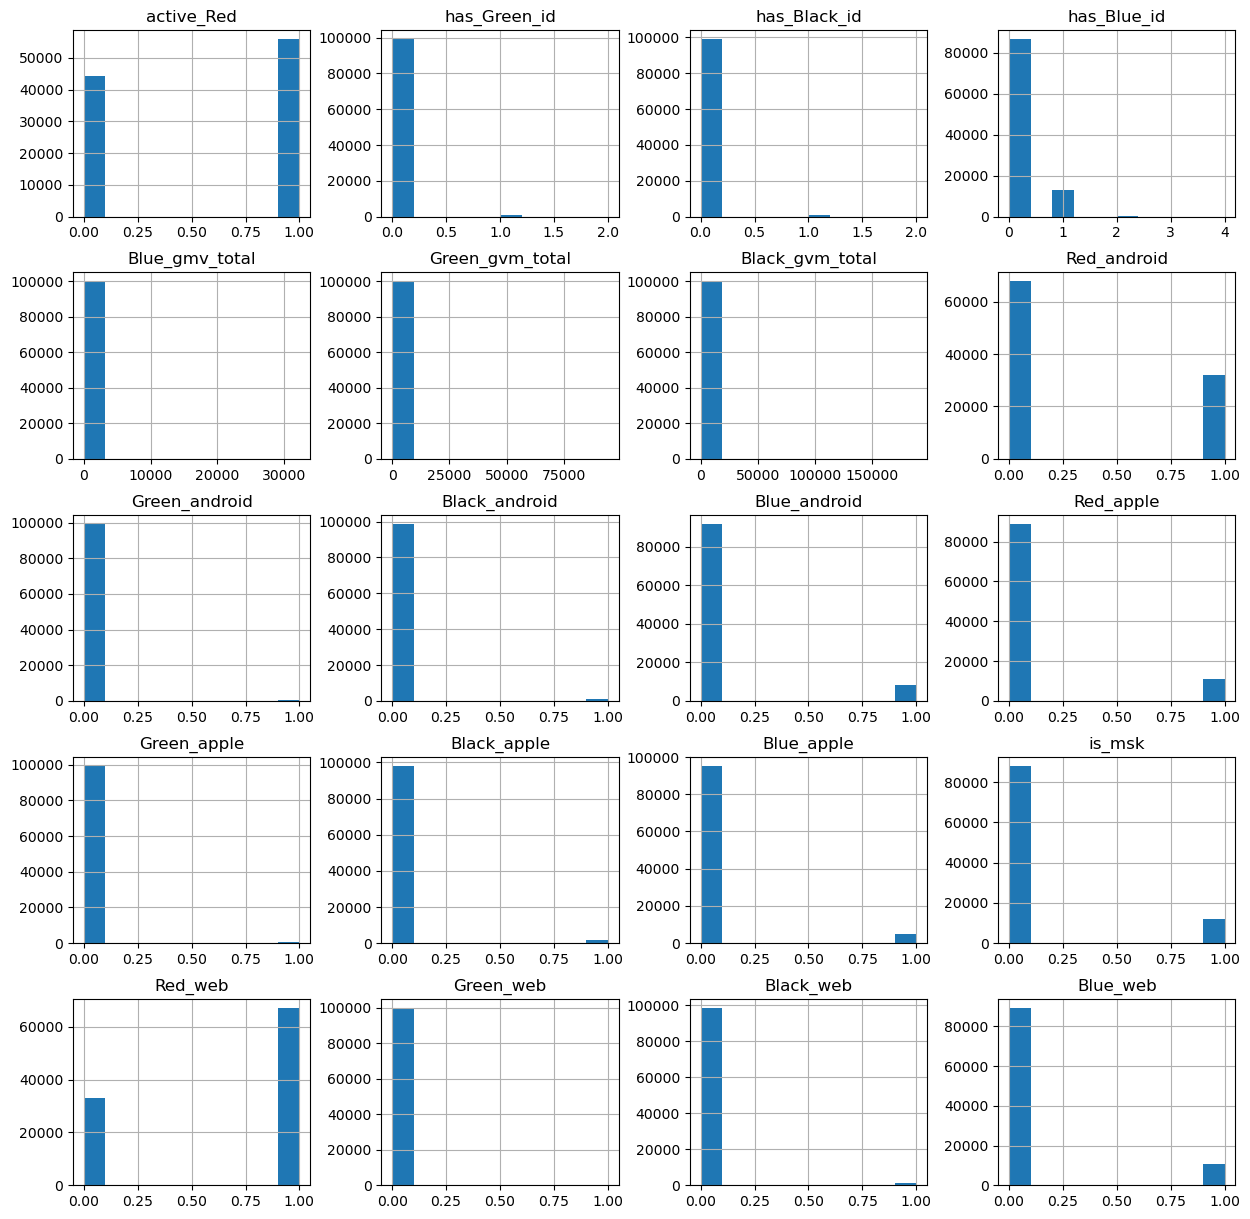

In [8]:
df.hist(figsize=(15, 15))
plt.show()

### Вывод
В данных есть один пропуск, который можно удалить. Есть пользователи с несколькими аккаунтами в одной компании. Их следует заменить единицами, чтобы они не учитывались при суммировании. Столбцы `Blue_activity_count`, `Green_gvm_order_count` и `Black_gvm_order_count` имеют тип данных object, хотя должны иметь числовой тип. По распределениям видно, что у компании "Red" больше всех пользователей, большая часть которых пользуется приложением на ПК. Судя по тому, что количество пользователей приложения компании "Red" на ПК превышает количество аккаунтов, есть возможность пользоваться сервисом без регистрации. Для этой компании отсутствуют данные по gmv, поэтому сравнений с другими компаниями в плане эффективности продаж провести не получится.

## 2. Предобработка данных
### 2.1. Обработка пропусков
В данных один пропуск. Его можно удалить

In [9]:
df.dropna(inplace=True)

### 2.2. Обработка дубликатов

In [10]:
df.duplicated().sum()

0

In [11]:
df['HID'].duplicated().sum()

0

Дублей в данных нет

### 2.3. Изменение типов данных
Необходимо заменить тип данных в столбцах `Blue_activity_count`, `Green_gvm_order_count` и `Black_gvm_order_count` на float.

In [12]:
df['Blue_activity_count'].value_counts().sort_values()

47.0                       1
90.0                       1
2019-05-04 00:00:00        1
2019-05-06 00:00:00        1
2019-05-03 00:00:00        1
                       ...  
4.0                      288
3.0                      425
2.0                      626
1.0                     1369
0.0                    96112
Name: Blue_activity_count, Length: 69, dtype: int64

В столбец попали даты. Их стоит заменить нулями

In [13]:
df['Blue_activity_count'] = df['Blue_activity_count'].apply(lambda x: float(x) if not isinstance(x, datetime.datetime) else 0)

In [14]:
df['Blue_activity_count'].value_counts().sort_values()

47.0         1
38.0         1
59.0         1
237.0        1
100.0        1
         ...  
4.0        288
3.0        425
2.0        626
1.0       1369
0.0      96119
Name: Blue_activity_count, Length: 64, dtype: int64

In [15]:
df['Green_gvm_order_count'].value_counts().sort_values()

2019-05-02 00:00:00        1
60.0                       1
43.0                       1
78.0                       1
76.0                       1
                       ...  
3.0                       70
4.0                       81
2.0                      124
1.0                      237
0.0                    99114
Name: Green_gvm_order_count, Length: 71, dtype: int64

In [16]:
df['Green_gvm_order_count'] = df['Green_gvm_order_count'].apply(lambda x: float(x) if not isinstance(x, datetime.datetime) else 0)

In [17]:
df['Green_gvm_order_count'].value_counts().sort_values()

60.0         1
114.0        1
69.0         1
125.0        1
88.0         1
         ...  
3.0         70
4.0         81
2.0        124
1.0        237
0.0      99117
Name: Green_gvm_order_count, Length: 69, dtype: int64

In [18]:
df['Black_gvm_order_count'].value_counts().sort_values().head()

2019-05-06 00:00:00    1
50.0                   1
37.0                   1
33.0                   1
27.0                   1
Name: Black_gvm_order_count, dtype: int64

In [19]:
df['Black_gvm_order_count'] = df['Black_gvm_order_count'].apply(lambda x: float(x) if not isinstance(x, datetime.datetime) else 0)

In [20]:
df['Black_gvm_order_count'].value_counts().sort_values().head()

36.0    1
34.0    1
60.0    1
42.0    1
50.0    1
Name: Black_gvm_order_count, dtype: int64

Данные по количеству заказов и подсчету активных действий в сервисе приведены к типу float. Несоответствующие данные (даты) заменены на нули

### 2.4. Обработка аномальных значений
В столбцах `has_Green_id`, `has_Black_id` и `has_Blue_id` показано, что на одного пользователя может приходиться до четырех аккаунтов. Нужно привести все значения, превышающие 1, к 1.

In [21]:
df.loc[df['has_Green_id'] > 1, 'has_Green_id'] = 1
df['has_Green_id'].max()

1.0

In [22]:
df.loc[df['has_Black_id'] > 1, 'has_Black_id'] = 1
df['has_Black_id'].max()

1.0

In [23]:
df.loc[df['has_Blue_id'] > 1, 'has_Blue_id'] = 1
df['has_Blue_id'].max()

1.0

### Вывод
В результате предобработки удален 1 пропуск, тип данных в столбцах `Blue_activity_count`, `Green_gvm_order_count` и `Black_gvm_order_count` приведен к float. Несоответствующие значения в данных столбцах заменены на нули. В столбцах `has_Green_id`, `has_Black_id` и `has_Blue_id` значения больше 1 заменены на 1. Дубикатов в данных не обнаружено.

## 3. Исследовательский анализ данных
### 3.1. Абсолютные показатели
Для начала сравним доступные показатели компаний в абсолютном выражении

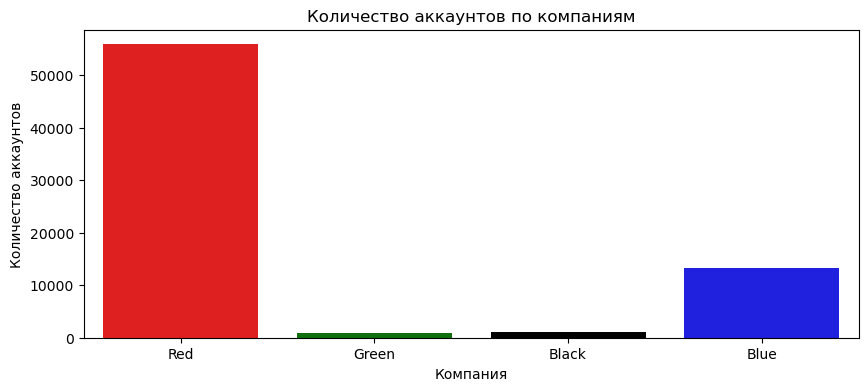

In [24]:
plt.figure(figsize=(10,4))
sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], 
            y=[df['active_Red'].sum(), df['has_Green_id'].sum(), df['has_Black_id'].sum(), df['has_Blue_id'].sum()],
           palette=['red', 'green', 'black', 'blue'])
plt.title("Количество аккаунтов по компаниям")
plt.xlabel("Компания")
plt.ylabel("Количество аккаунтов")
plt.show()

По количеству аккаунтов с большим отрывом лидирует компания "Red", за ней идет "Blue"

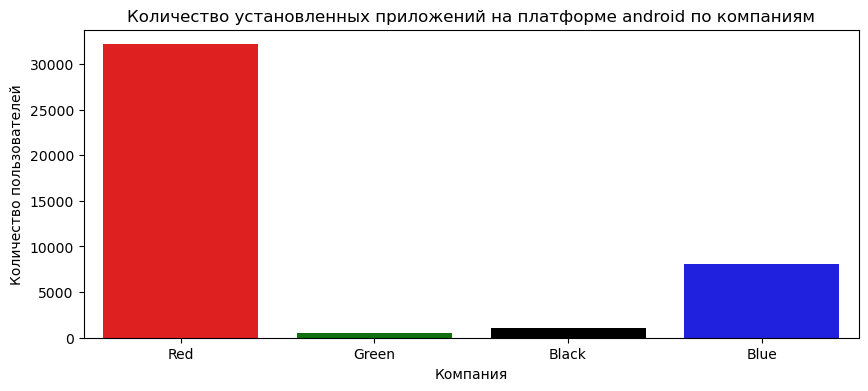

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], 
            y=[df['Red_android'].sum(), df['Green_android'].sum(), df['Black_android'].sum(), df['Blue_android'].sum()],
           palette=['red', 'green', 'black', 'blue'])
plt.title("Количество установленных приложений на платформе android по компаниям")
plt.xlabel("Компания")
plt.ylabel("Количество пользователей")
plt.show()

С количеством установленных приложений компаний на android ситуация похожая 

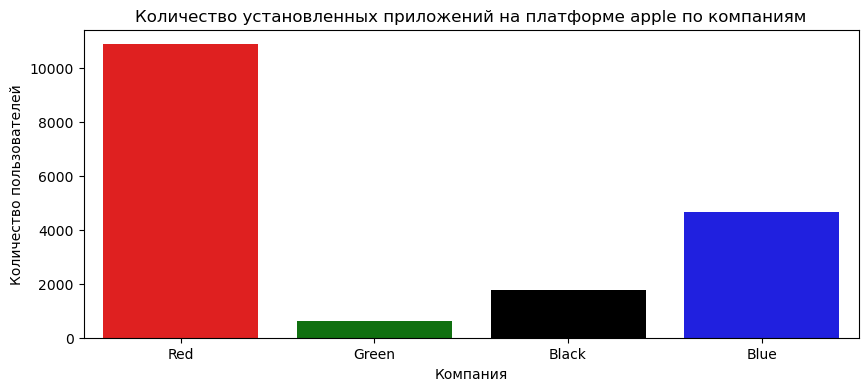

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], 
            y=[df['Red_apple'].sum(), df['Green_apple'].sum(), df['Black_apple'].sum(), df['Blue_apple'].sum()],
           palette=['red', 'green', 'black', 'blue'])
plt.title("Количество установленных приложений на платформе apple по компаниям")
plt.xlabel("Компания")
plt.ylabel("Количество пользователей")
plt.show()

С apple тоже, только заметно уменьшение относительного отрыва компании "Red"

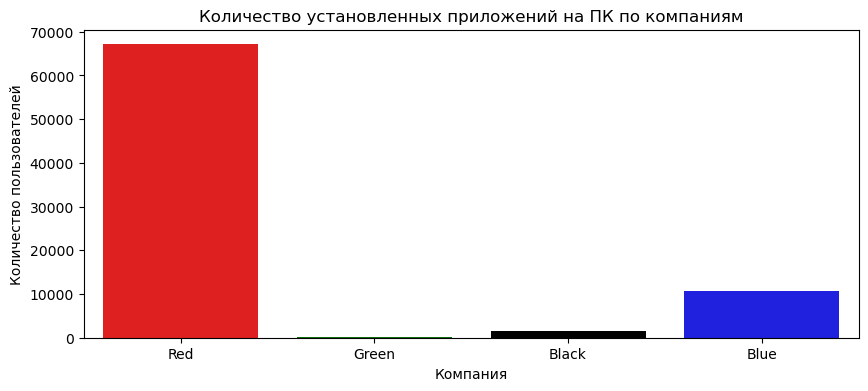

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], 
            y=[df['Red_web'].sum(), df['Green_web'].sum(), df['Black_web'].sum(), df['Blue_web'].sum()],
           palette=['red', 'green', 'black', 'blue'])
plt.title("Количество установленных приложений на ПК по компаниям")
plt.xlabel("Компания")
plt.ylabel("Количество пользователей")
plt.show()

С десктопным приложением такая же ситуация

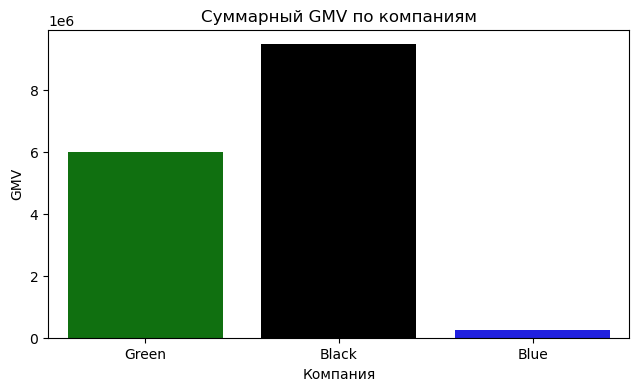

In [28]:
plt.figure(figsize=(7.5,4))
sns.barplot(x=['Green', 'Black', 'Blue'], 
            y=[df['Green_gvm_total'].sum(), df['Black_gvm_total'].sum(), df['Blue_gmv_total'].sum()],
           palette=['green', 'black', 'blue'])
plt.title("Суммарный GMV по компаниям")
plt.xlabel("Компания")
plt.ylabel("GMV")
plt.show()

Данные по суммарному gmv компании "Red" отсутствуют. Среди остальных суммарный gmv больше у "Black", далее "Green" и "Blue"

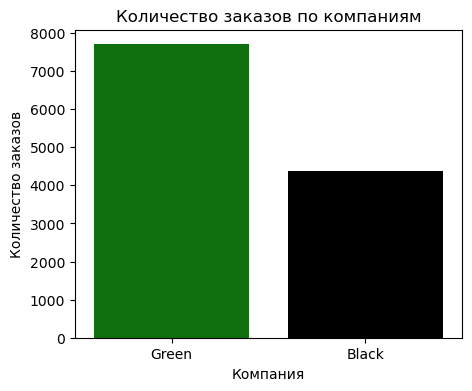

In [29]:
plt.figure(figsize=(5,4))
sns.barplot(x=['Green', 'Black'], 
            y=[df['Green_gvm_order_count'].sum(), df['Black_gvm_order_count'].sum()],
           palette=['green', 'black'])
plt.title("Количество заказов по компаниям")
plt.xlabel("Компания")
plt.ylabel("Количество заказов")
plt.show()

Информация по количеству заказов есть только для "Green" и "Black". У "Green" больше заказов, соответственно, ниже средний чек заказа.

Подсчет активности пользователя в сервисе есть только у компании "Blue"

In [30]:
print('Количество активнх действий пользователей в сервисе компании "Blue":', int(df['Blue_activity_count'].sum()))

Количество активнх действий пользователей в сервисе компании "Blue": 21004


Индикаторы наличия приложения компании разбиты на категории. Можно добавить столбец для каждой компании, показывающий есть ли у пользователя приложение без учета платформы.

In [31]:
df['has_Red_app'] = np.where((df['Red_android'] + df['Red_apple'] + df['Red_web']) == 0, 0, 1)

In [32]:
df['has_Green_app'] = np.where((df['Green_android'] + df['Green_apple'] + df['Green_web']) == 0, 0, 1)

In [33]:
df['has_Black_app'] = np.where((df['Black_android'] + df['Black_apple'] + df['Black_web']) == 0, 0, 1)

In [34]:
df['has_Blue_app'] = np.where((df['Blue_android'] + df['Blue_apple'] + df['Blue_web']) == 0, 0, 1)

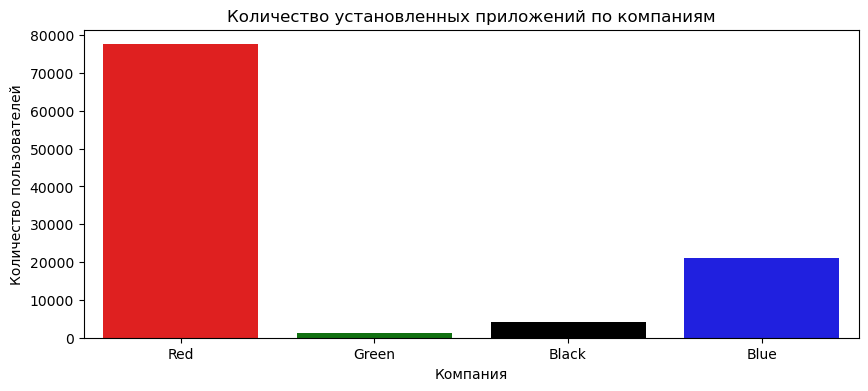

In [35]:
plt.figure(figsize=(10,4))
sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], 
            y=[df['has_Red_app'].sum(), df['has_Green_app'].sum(), df['has_Black_app'].sum(), df['has_Blue_app'].sum()],
           palette=['red', 'green', 'black', 'blue'])
plt.title("Количество установленных приложений по компаниям")
plt.xlabel("Компания")
plt.ylabel("Количество пользователей")
plt.show()

Больше всего приложений установлено для сервиса компании "Red", далее "Blue", "Black" и "Green"

Посмотрим пользоватлей какой компании больше в Москве

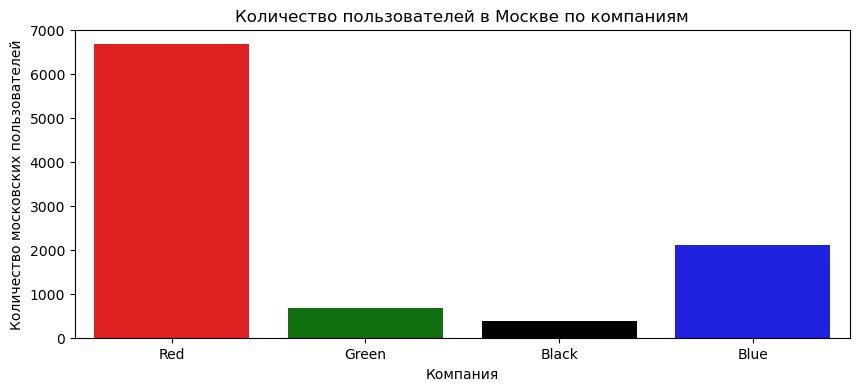

In [36]:
plt.figure(figsize=(10,4))
sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], 
            y=[df[df['is_msk'] == 1]['active_Red'].sum(), df[df['is_msk'] == 1]['has_Green_id'].sum(),
               df[df['is_msk'] == 1]['has_Black_id'].sum(), df[df['is_msk'] == 1]['has_Blue_id'].sum()],
           palette=['red', 'green', 'black', 'blue'])
plt.title("Количество пользователей в Москве по компаниям")
plt.xlabel("Компания")
plt.ylabel("Количество московских пользователей")
plt.show()

Распределение пользователей по Москве немного отличается от общего. Количество московский пользователей сервиса "Green" выше, чем у "Black"

### 3.2. Относительные показатели
Посмотрим какая доля пользователей с аккаунтами установила приложения

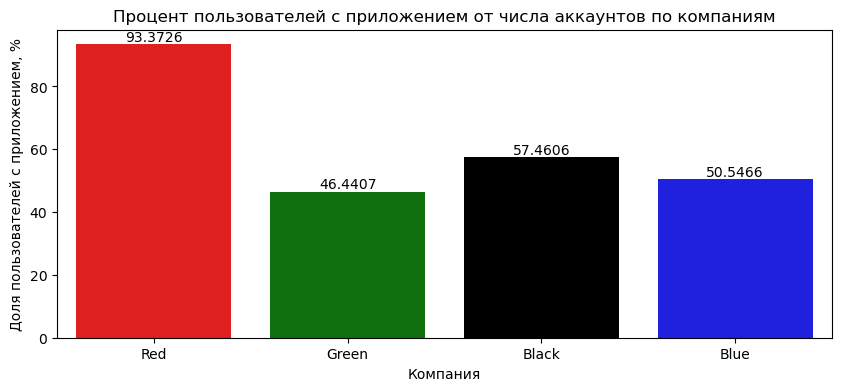

In [37]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], 
            y=[df[df['active_Red'] == 1]['has_Red_app'].mean() * 100, df[df['has_Green_id'] == 1]['has_Green_app'].mean() * 100,
               df[df['has_Black_id'] == 1]['has_Black_app'].mean() * 100, df[df['has_Blue_id'] == 1]['has_Blue_app'].mean() * 100],
           palette=['red', 'green', 'black', 'blue'])
ax.bar_label(ax.containers[0])
plt.title("Процент пользователей с приложением от числа аккаунтов по компаниям")
plt.xlabel("Компания")
plt.ylabel("Доля пользователей с приложением, %")
plt.show()

Доля установок приложения от всех аккаунтов выше у компании "Red" со значением 93%, далее "Black" (57%), "Blue" (51%) и "Green" (46%)

Рассчитаем средний чек для компаний "Green" и "Black"

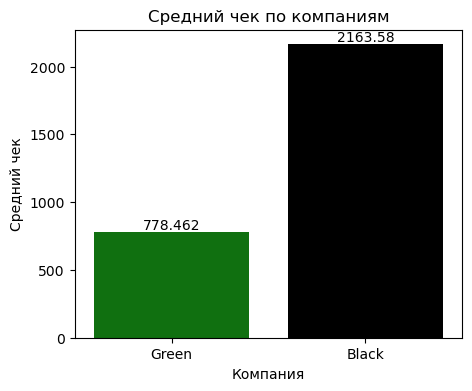

In [38]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=['Green', 'Black'], 
            y=[df['Green_gvm_total'].sum() / df['Green_gvm_order_count'].sum(), 
               df['Black_gvm_total'].sum() / df['Black_gvm_order_count'].sum()],
           palette=['green', 'black'])
ax.bar_label(ax.containers[0])
plt.title("Средний чек по компаниям")
plt.xlabel("Компания")
plt.ylabel("Средний чек")
plt.show()

Как и предполагалось, средний чек заказа у компании "Green" почти в 3 раза ниже, чем у компании "Black".

### Вывод
По данным видно, что компания "Red" имеет самую большую базу пользователей, отношение пользователей с установленным приложение к количеству аккаунтов составляет 93%. Для компании отсутствуют показатели GMV и количества заказов, поэтому сравнивать её с другими компаниями нет возможности. Из оставшихся компаний, суммарный GMV самый высокий у компании "Black", далее идут "Green" и сильно отстает "Blue". При этом у компании "Green" больше заказов, чем у компании "Black". Средний чек заказа в компании "Green" почти в 3 раза ниже, чем в "Black" (778 против 2164). Компания "Green" немного отстает от "Black" по общему количеству пользователей, но пользователей в Москве у нее больше.

## Заключение
Представленные данные для анализа содержат неоднородную информацию по компаниям. Так, для компании "Red" отсутствуют данные по суммарному GMV, количеству акутивных действий пользователя в приложении и количеству заказов. Для "Blue" нет количества заказов. У "Green" и "Black" отсутствуют показатели активности пользователей в сервисе.

Исходные данные для анализа содержали 1 пропуск. Строка с пропуском была удалена. Дубликатов в данных не обнаружено. Столбцы с количеством заказов и активных действий пользователя содержали даты. Возможно наличие технической ошибки при сборе данных. Ячейки, содержащие даты были заполнены нулями, а столбцы приведены к типу float. В столбцах с наличием зарегистрированного аккаунта у компаний "Green", "Black" и "Blue" встречались значения до 4 аккаунтов на одного пользователя. Значения свыше 1 в ячейках заменены на 1.

Анализ показал, что компания "Red" имеет самую большую базу пользователей, отношение пользователей с установленным приложение к количеству аккаунтов составляет 93%. Для данной компании отсутствуют показатели суммарного GMV, активности пользователей в сервисе и количества заказов, поэтому сравнивать её с другими компаниями нет возможности. Из оставшихся компаний, суммарный GMV самый высокий у компании "Black", далее идут "Green" и сильно отстает "Blue". При этом у компании "Green" больше заказов, чем у компании "Black". Средний чек заказа в компании "Green" почти в 3 раза ниже, чем в "Black" (778 против 2164). Компания "Green" немного отстает от "Black" по общему количеству пользователей, но пользователей в Москве у нее больше.

Таким образом, можно заключить, что, вероятно, лидером рынка, среди рассматриваемых компаний, является "Red", несмотря на отстутствие данных. Компания "Blue" имеет вторую по величине базу пользователей, но при этом самый низкий суммарный GMV. Возможно, пользователи не могут найти то, что требуется или отдают предпочтение другому сервису. Компании "Green" и "Black", похоже, занимают какие-то ниши. Компания "Green" ориентируется на Москву в качестве основного региона деятельности. В "Green" пользователи совершают множество мелких заказов, а в "Black" меньше, но более крупные по сумме.